In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from math import floor

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
#mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"
import pint
ureg = pint.UnitRegistry()
Q_ = ureg.Quantity
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    Q_([])

In [4]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

lineal0 = lambda x,a : a*x
lineal = lambda x,a,b : a*x+b

ureg = pint.UnitRegistry()

In [19]:
files = os.listdir('med 0 freq')
freqs = []
for file in files:
    freqs.append(float(file[:-4]))
freqs.sort()
freqs

[100.0,
 162.0,
 264.0,
 428.0,
 695.0,
 1129.0,
 1833.0,
 2976.0,
 4833.0,
 7848.0,
 12743.0,
 20691.0,
 33598.0,
 54556.0,
 88587.0,
 143845.0,
 233572.0,
 379269.0,
 615848.0,
 1000000.0]

Text(0, 0.5, 'Amplificación')

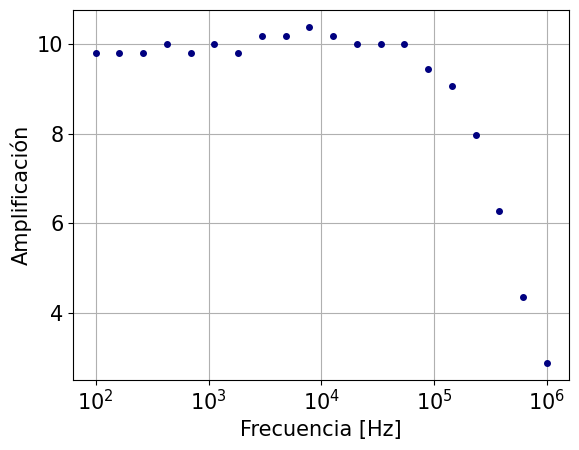

In [57]:
Vpp_out = []
Vpp_in = []
for freq in freqs:
    df = pd.read_csv(f'med 0 freq/{freq}.csv')
    Vpp_in.append(max(df.V_in)-min(df.V_in))
    Vpp_out.append(max(df.V_out)-min(df.V_out))
plt.scatter(freqs,np.array(Vpp_out)/np.array(Vpp_in),c='navy')
plt.xscale('log')
plt.grid()
plt.minorticks_off()
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplificación')

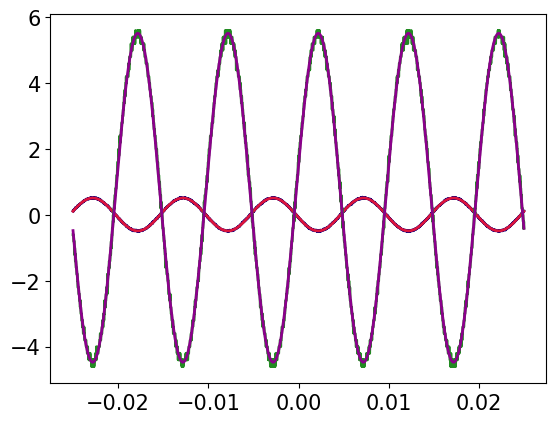

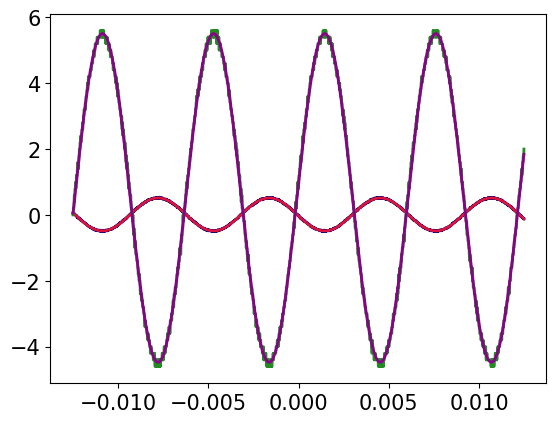

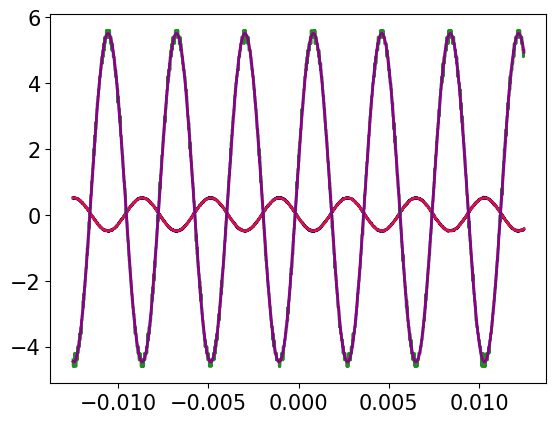

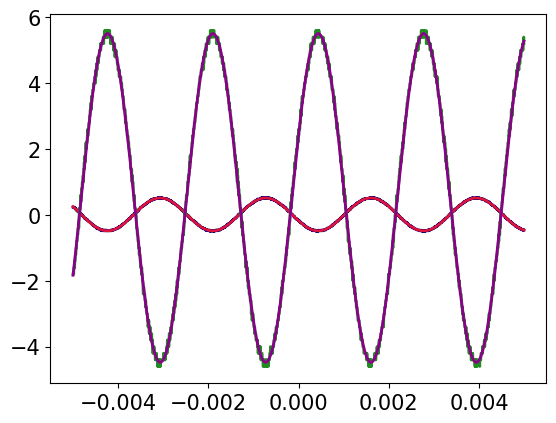

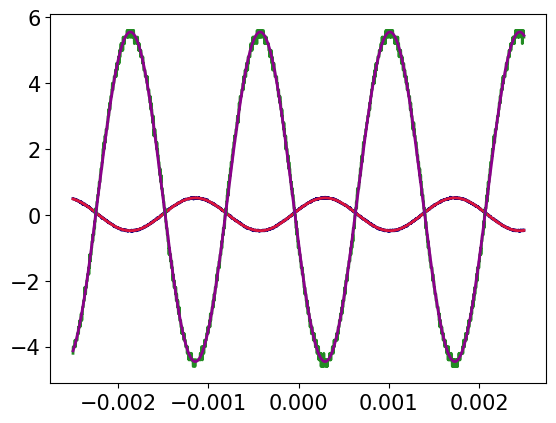

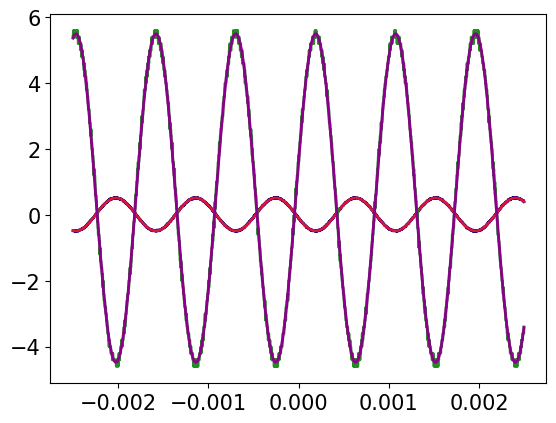

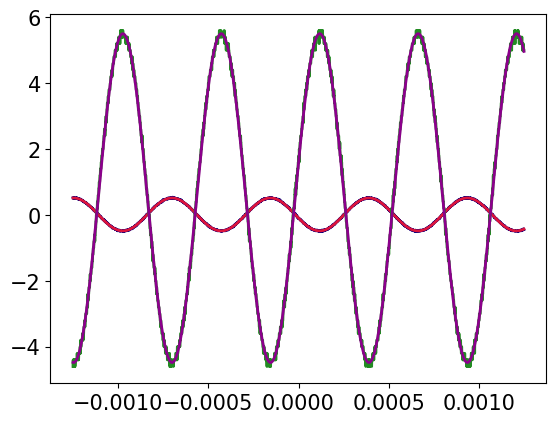

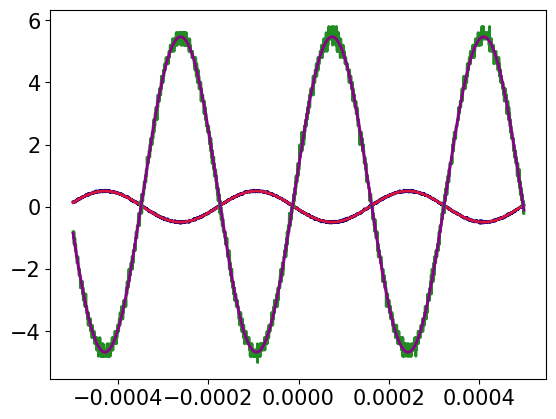

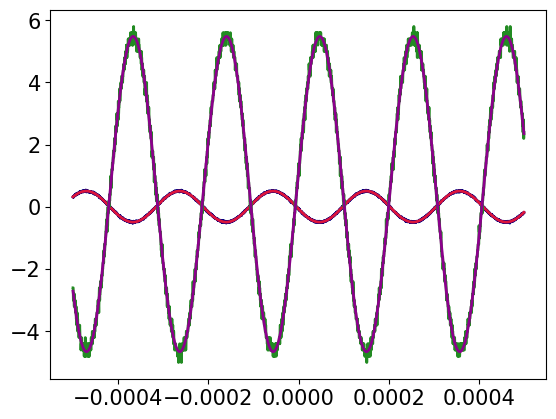

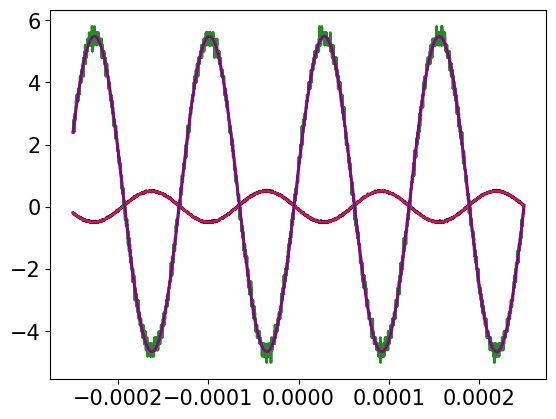

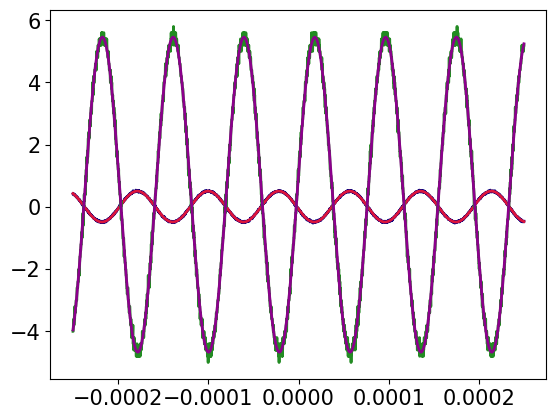

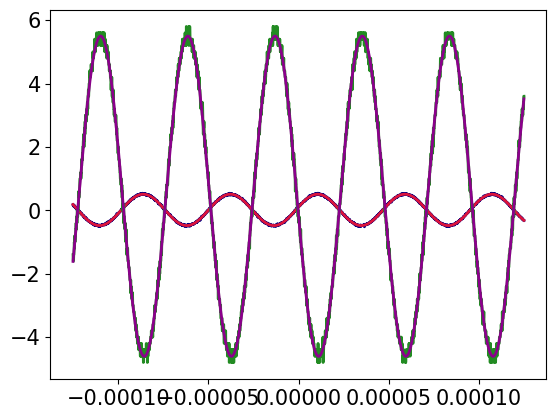

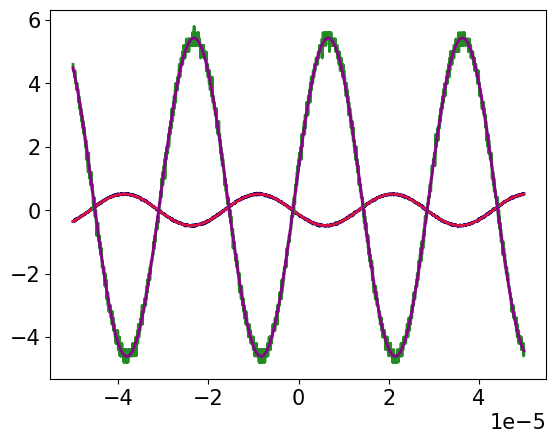

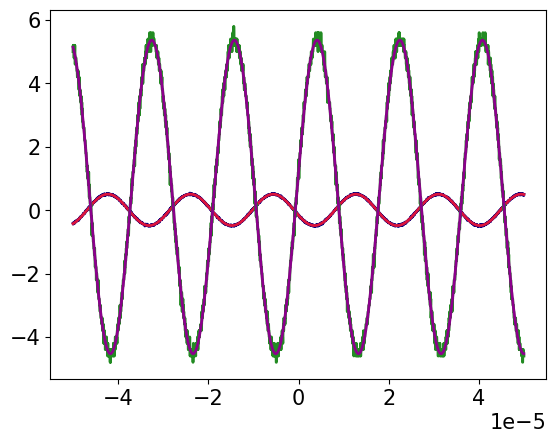

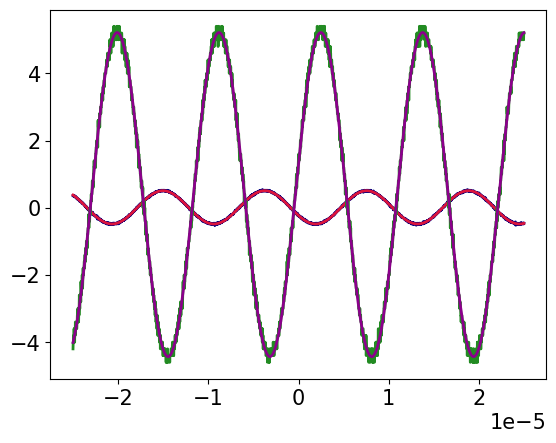

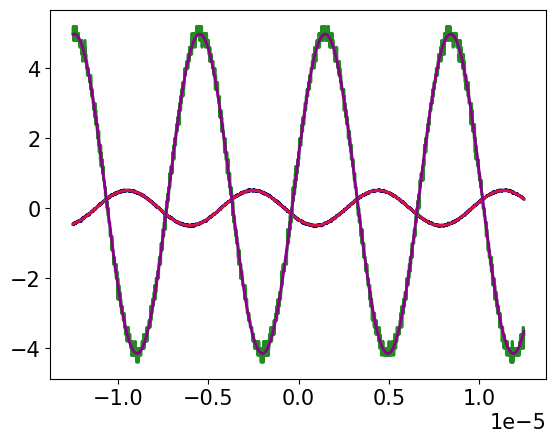

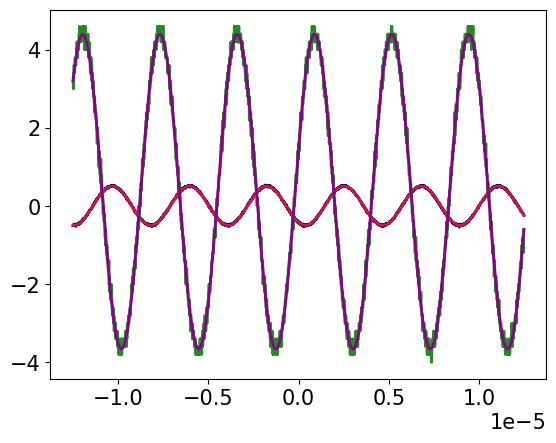

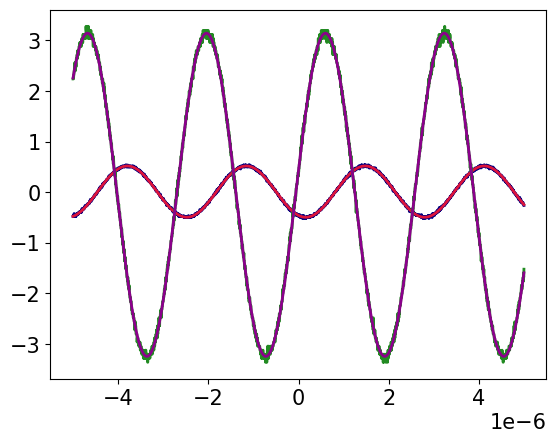

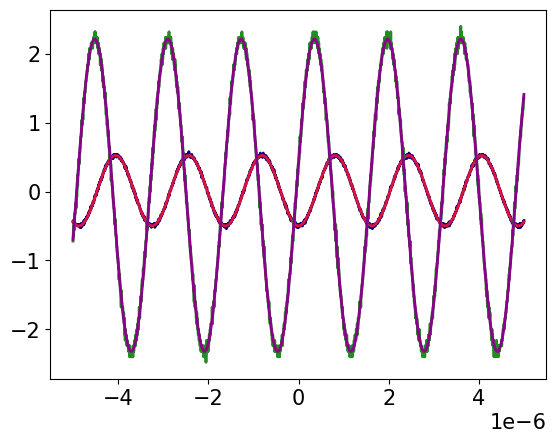

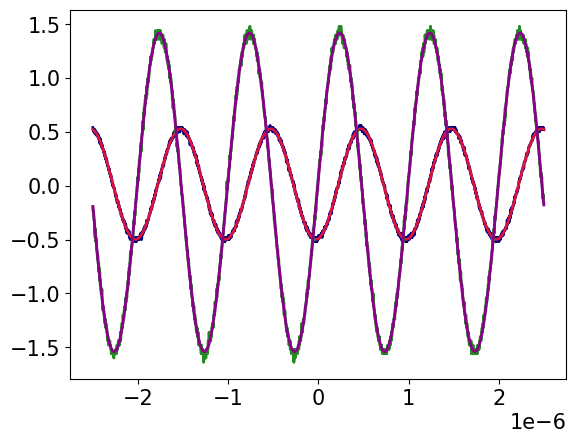

In [71]:
seno = lambda x,A,f,phi,B : abs(A)*np.sin(2*np.pi*f*x+phi) + B
amps_in = []
phis_in = []
amps_out = []
phis_out = []
for freq in freqs:
    df = pd.read_csv(f'med 0 freq/{freq}.csv')
    pars_in,cov_in = cf(seno,df.t,df.V_in,p0=[max(df.V_in),freq,0,max(df.V_in)+min(df.V_in)])
    amps_in.append(pars_in[0])
    phis_in.append(pars_in[2])
    pars_out,cov_out = cf(seno,df.t,df.V_out,p0=[max(df.V_out),freq,0,max(df.V_out)+min(df.V_out)])
    amps_out.append(pars_out[0])
    phis_out.append(pars_out[2])
    plt.plot(df.t,df.V_in,'navy')
    plt.plot(df.t,seno(df.t,*pars_in),'crimson')
    plt.plot(df.t,df.V_out,'forestgreen')
    plt.plot(df.t,seno(df.t,*pars_out),'darkmagenta')
    plt.show()

In [72]:
amps_in = np.array(amps_in)
phis_in = np.array(phis_in)
amps_out = np.array(amps_out)
phis_out = np.array(phis_out)

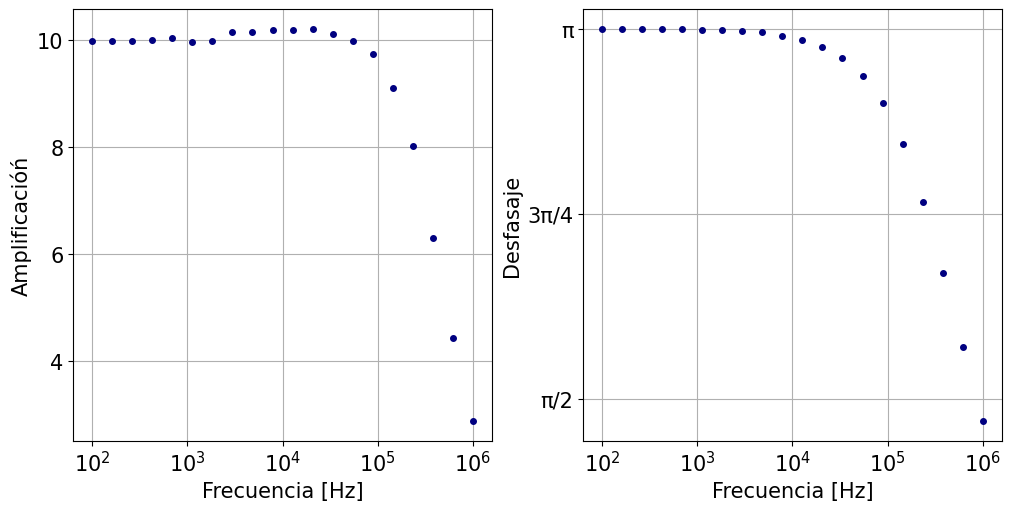

In [114]:
from fractions import Fraction
fig,axs = plt.subplots(1,2,figsize=(10,5),layout='constrained')
amplificacion = abs(amps_out/amps_in)
desfasaje = np.mod(phis_out-phis_in,2*np.pi)
axs[0].scatter(freqs,amplificacion,c='navy')
axs[0].set_xscale('log')
axs[0].set_xlabel('Frecuencia [Hz]')
axs[0].set_ylabel('Amplificacióń')
axs[0].grid()
axs[0].minorticks_off()
axs[0].locator_params(axis='y',nbins=5)
axs[1].scatter(freqs,desfasaje,c='navy')
axs[1].set_xscale('log')
axs[1].set_xlabel('Frecuencia [Hz]')
axs[1].set_ylabel('Desfasaje')
axs[1].grid()
axs[1].minorticks_off()
y_tick_positions = [0.5*np.pi,0.75*np.pi,np.pi]
y_tick_labels = ['π/2', '3π/4', 'π']
axs[1].set_yticks(y_tick_positions)
axs[1].set_yticklabels(y_tick_labels)
plt.savefig('G4 24-10.pdf')